In [1]:
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
state_file = '/mnt/d/books/iitm/agentBased/data/tn/incovid19/state_wise/original.csv'
types = {
    "Date":"string",
    "State":"string",
    "Confirmed":"Int64",
    "Recovered":"Int64",
    "Deceased":"Int64",
    "Other":"Int64",
    "Tested":"Int64"
}
state_df = pd.read_csv(state_file, sep=',', dtype=types)

In [4]:
tn_df = state_df[state_df['State'] == 'Tamil Nadu'].reset_index(drop=True)
tn_df.rename(columns={"Confirmed":"cum_confirmed", "Recovered":"cum_recovered", "Deceased":"cum_deceased", "Tested":"cum_tested", "State":"state", "Date":"date", "Other":"other"}, inplace=True)
tn_df = tn_df.sort_values('date').reset_index(drop=True)
tn_df.head(n=5)

,date,state,cum_confirmed,cum_recovered,cum_deceased,other,cum_tested
0,2020-03-07,Tamil Nadu,1,0,0,0,<NA>
1,2020-03-08,Tamil Nadu,1,0,0,0,<NA>
2,2020-03-09,Tamil Nadu,1,0,0,0,<NA>
3,2020-03-10,Tamil Nadu,1,0,0,0,<NA>
4,2020-03-11,Tamil Nadu,1,0,0,0,<NA>


In [5]:
def get_daily_cases(row, key, prev_cnt):
    if  pd.isnull(row[key]) or row[key] == 0:
        return 0
    daily_cnt = row[key] - prev_cnt[key]
    if daily_cnt < 0:
        # print(f'{row["date"]} {row["district"]} {row[key]} {prev_cnt[row["district"]]}')
        daily_cnt = 0
    prev_cnt[key] = row[key]
    return daily_cnt

In [6]:
prev_cnt = defaultdict(int)
tn_df['new_tested'] = tn_df.apply(lambda r: get_daily_cases(r, 'cum_tested', prev_cnt), axis=1)

In [7]:
# tn_df.at[585, 'new_tested'] = 137423
# tn_df.at[584, 'new_tested'] = 139836

<AxesSubplot:xlabel='date'>

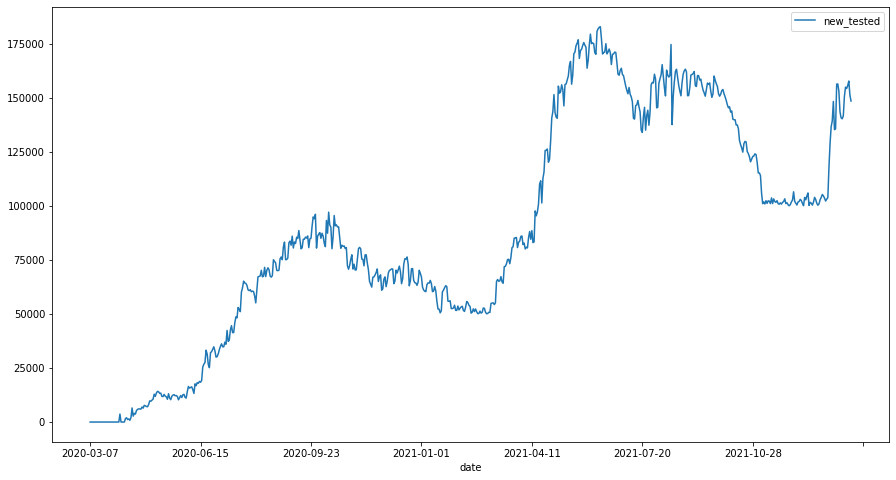

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
tn_df.plot(ax=ax, kind='line', x='date', y='new_tested')

In [9]:
# test_file = '/mnt/d/books/iitm/agentBased/data/tn/incovid19/state_wise/test_refactor.csv'
# tn_df.to_csv(test_file, sep=',', index=False, header=True)

In [10]:
tn_df['new_confirmed'] = tn_df.apply(lambda r: get_daily_cases(r, 'cum_confirmed', prev_cnt), axis=1)

<AxesSubplot:xlabel='date'>

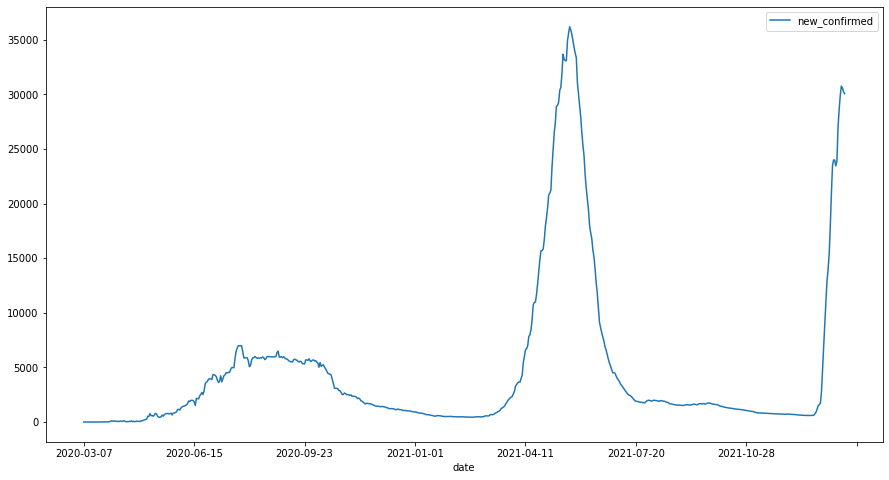

In [11]:
fig, ax = plt.subplots(figsize=(15, 8))
tn_df.plot(ax=ax, kind='line', x='date', y='new_confirmed')

In [12]:
district_file = '/mnt/d/books/iitm/agentBased/data/tn/incovid19/cases/cases_district_refactor.csv'
types = {
    "date":"string",
    "state":"string",
    "district":"string",
    "cum_confirmed":"Int64",
    "cum_recovered":"Int64",
    "cum_deceased":"Int64",
    "cum_tested":"Int64",
    "other":"Int64",
    "new_confirmed":"Int64",
    "new_recovered":"Int64",
    "new_deceased":"Int64",
    "new_tested":"Int64"
}
dist_df = pd.read_csv(district_file, sep=',', dtype=types)

<AxesSubplot:xlabel='date'>

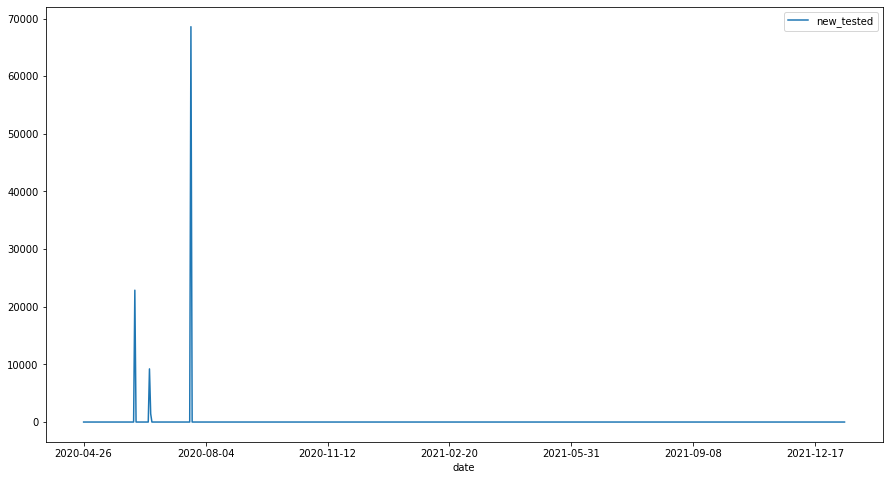

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
dist_df[dist_df['district'] == 'Coimbatore'].plot(ax=ax, kind='line', x='date', y='new_tested')